In [1]:
# Theses are different ways to display figures, depending on the
# environment, some may work better or some not at all:
# %matplotlib inline
%matplotlib widget
#      widget (installed by ``pip install ipympl``) gives better interactive inline plots
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib nbagg
# Fix failing variable completion (for older installations):
# %config Completer.use_jedi = False

# First, Simplest Usecase

Let's optimize a simple ellipsoid function, $\sum_{i=1}^n 1000^{\frac{i-1}{n-1}}x_i^2$, whose Hessian has a condition number of $10^6$:

In [2]:
# pip install cma  # outcomment in case the cma module is not installed
import cma

fun = cma.ff.elli  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
x0 = 4 * [2]  # initial solution
sigma0 = 1    # initial standard deviation to sample new solutions

In [3]:
x, es = cma.fmin2(fun, x0, sigma0)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=333628, Wed Jul 23 21:37:17 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 7.987258292361931e+05 1.0e+00 9.36e-01  9e-01  1e+00 0:00.0
    2     16 2.527228795523497e+05 1.3e+00 9.27e-01  8e-01  1e+00 0:00.0
    3     24 7.318597299451040e+04 1.6e+00 8.48e-01  7e-01  9e-01 0:00.0
  100    800 9.601561703631069e-05 8.3e+02 8.02e-03  9e-06  8e-03 0:00.0
  182   1456 5.726205562664969e-16 1.1e+03 5.74e-07  2e-11  2e-08 0:00.1
termination on tolfun=1e-11 (Wed Jul 23 21:37:17 2025)
final/bestever f-value = 2.676336e-16 2.676336e-16 after 1457/1457 evaluations
incumbent solution: [-8.63219946e-09, -9.06255284e-10, 3.95967379e-11, -9.76267896e-12]
std deviation: [1.94348346e-08, 1.93905555e-09, 2.59496025e-10, 1.80493542e-11]


The return values are
- `x`, the best evaluated solution and
- `es`, the `cma.CMAEvolutionStrategy` class instance used to run the optimization.

The latter contains all available information about the run and the more complete return value under `es.result`.

In [4]:
es.result._asdict()  # pretty print the named tuple as dictionary

{'xbest': array([-8.63219946e-09, -9.06255284e-10,  3.95967379e-11, -9.76267896e-12]),
 'fbest': 2.676336486388782e-16,
 'evals_best': 1457,
 'evaluations': 1457,
 'iterations': 182,
 'xfavorite': array([-8.63219946e-09, -9.06255284e-10,  3.95967379e-11, -9.76267896e-12]),
 'stds': array([1.94348346e-08, 1.93905555e-09, 2.59496025e-10, 1.80493542e-11]),
 'stop': {'tolfun': 1e-11}}

In [5]:
es.result_pretty()  # pretty print some information and returns es.result

termination on tolfun=1e-11
final/bestever f-value = 2.676336e-16 2.676336e-16 after 1457/1457 evaluations
incumbent solution: [-8.63219946e-09, -9.06255284e-10, 3.95967379e-11, -9.76267896e-12]
std deviation: [1.94348346e-08, 1.93905555e-09, 2.59496025e-10, 1.80493542e-11]


CMAEvolutionStrategyResult(xbest=array([-8.63219946e-09, -9.06255284e-10,  3.95967379e-11, -9.76267896e-12]), fbest=2.676336486388782e-16, evals_best=1457, evaluations=1457, iterations=182, xfavorite=array([-8.63219946e-09, -9.06255284e-10,  3.95967379e-11, -9.76267896e-12]), stds=array([1.94348346e-08, 1.93905555e-09, 2.59496025e-10, 1.80493542e-11]), stop={'tolfun': 1e-11})

# Options
CMA-ES options can be passed as fourth parameter to `cma.fmin2`. Valid options are

In [6]:
cma.CMAOptions()  # as of cma.__version__ == '4.0.0'

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_active': 'True  # negative update, conducted after the original update',
 'CMA_active_injected': '0  #v weight multiplier for negative weights of injected solutions',
 'CMA_cmean': '1  # learning rate for the mean value',
 'CMA_const_trace': 'False  # normalize trace, 1, True, "arithm", "geom", "aeig", "geig" are valid',
 'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_diagonal_decoding': '0  # learning rate multiplier for additional diagonal update',
 'CMA_eigenmethod': 'np.linalg.eigh  # or cma.utilities.math.eig or pygsl.eigen.eigenvectors',
 'CMA_elitist': 'False  #v or "initial" or True, elitism likely impairs global search performance',
 'CMA_injections_threshold_keep_len': '1  #v keep length if Mahalanobis length is below the given relative threshold',
 'CMA_mirrors': 'popsize < 6  # values <0.5 are int

A `#v` indicates versatile options that can be changed at any time during the run by changing the `opts` attribute of the underlying [`CMAEvolutionStrategy`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAEvolutionStrategy.html) class instance.

To run the code entirely quietly, for example for benchmarking or in final production runs when the desired behavior is established, use `{'verbose': -9}`.

### Integer Variables
Integer variable indices can be indicated with the `integer_variables` option. Integer variables are rounded to their integer values (since version `4.2.1`). Technically, they induce setting lower bounds on the standard deviations and integer centering (Marty et al 2024).

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 4 (seed=482776, Wed Jul 23 21:37:17 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 7.964501664456680e+07 1.0e+00 2.09e+00  2e+00  2e+00 0:00.0
    2     24 3.857207519282734e+07 1.4e+00 2.76e+00  3e+00  3e+00 0:00.0
    3     36 1.092875784823646e+07 1.6e+00 3.50e+00  3e+00  4e+00 0:00.0
   71    852 5.761548809925203e-07 2.9e+03 1.10e-02  4e-06  2e-01 0:00.0
termination on ftarget=1e-06 (Wed Jul 23 21:37:18 2025)
final/bestever f-value = 4.760719e-06 5.761549e-07 after 853/850 evaluations
incumbent solution: [-0.00000000e+00, 1.47215328e-04, -0.00000000e+00, -1.61042959e-06]
std deviation: [2.00000000e-01, 4.06635553e-04, 2.00000000e-01, 4.19528741e-06]
f(best.x) = f([-0.00000000e+00  7.46993276e-05 -0.00000000e+00 -1.34743931e-07]) = 5.761548809925203e-07 = 5.761548809925203e-07


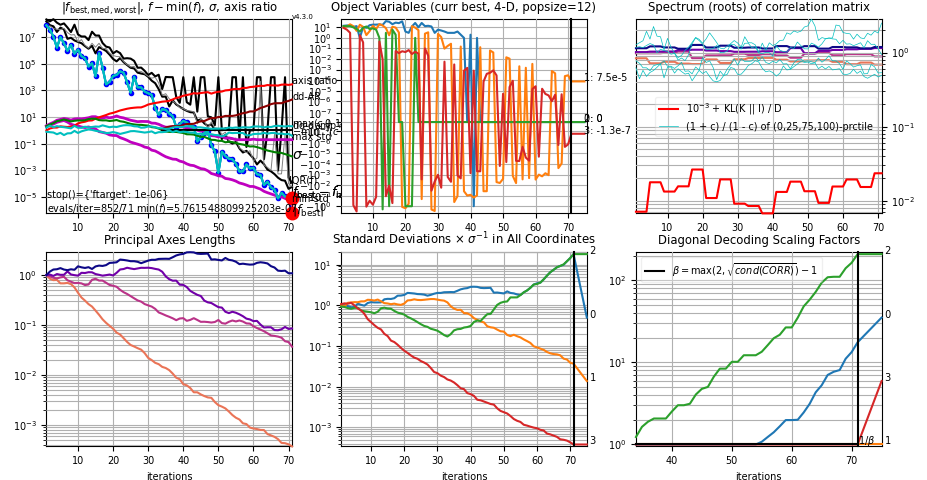

In [7]:
x, es = cma.fmin2(cma.ff.elli, 4 * [12], 2,
                  {'integer_variables':[0, 2], 'ftarget':1e-6})
print('f(best.x) = f({0}) = {1} = {2}'.format(es.best.x, es.best.f, cma.ff.elli(es.best.x)))
es.plot(xsemilog=True);

# Plotting
Let's plot some data from the optimization. The above call to `cma.fmin2` has (by default) written data to the default output folder `outcmaes`. These data will be overwritten each time the function is called again. To prevent this, we could set/change the output folder with the `verb_filenameprefix` option. An effective way to find out this kind of behavior is to query the [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) with a search string and read the comments in the return "value".

In [8]:
cma.CMAOptions('file')

{'signals_filename': 'cma_signals.in  # read versatile options from this file (use `None` or `""` for no file) which contains a single options dict, e.g. ``{"timeout": 0}`` to stop, string-values are evaluated, e.g. "np.inf" is valid',
 'verb_append': '0  # initial evaluation counter, if append, do not overwrite output files',
 'verb_filenameprefix': 'outcmaes/  # output path (folder) and filenames prefix',
 'verb_log': '1  #v verbosity: write data to files every verb_log iteration, writing can be time critical on fast to evaluate functions'}

Plotting is as simple as

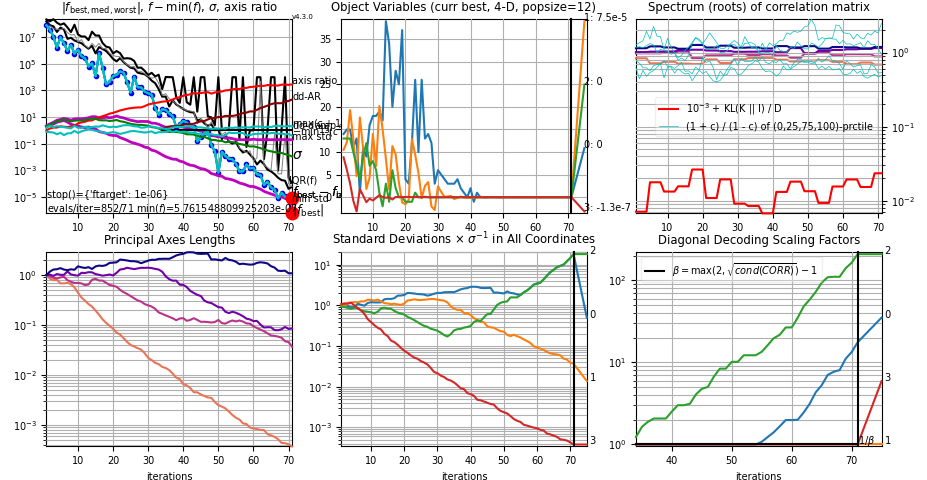

In [9]:
es.plot();  # cma.plot() does the same, as we just plot the data from the default output folder

A description of the output is given in the caption of Figure 3 in [Hansen et al (2015): Evolution Strategies](https://hal.inria.fr/hal-01155533/file/es-overview-2015.pdf#page=17).

# Variable Domain Boundaries

We can add a boundary condition on any variable. The easiest way is to use the function wrapper `BoundDomainTransform`. Let's bound the second variable from below to values $\ge1$.

In [10]:
lower_bounds = [None, 1, None]
bfun = cma.BoundDomainTransform(fun, [lower_bounds, None])  # bfun evaluates fun only in the bounded domain

xopt_b, es = cma.fmin2(bfun, x0, sigma0)  # may search in unbounded domain

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=437431, Wed Jul 23 21:37:27 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 9.368779088798750e+05 1.0e+00 1.03e+00  9e-01  1e+00 0:00.0
    2     16 1.779786020396052e+05 1.3e+00 1.29e+00  1e+00  2e+00 0:00.0
    3     24 7.786868381303777e+04 1.7e+00 1.41e+00  1e+00  2e+00 0:00.0
  100    800 1.000007973406477e+02 1.1e+03 2.20e-02  4e-05  4e-02 0:00.1
  187   1496 9.999999999999997e+01 9.2e+02 8.41e-07  4e-11  3e-08 0:00.1
termination on tolfun=1e-11 (Wed Jul 23 21:37:28 2025)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1497/1416 evaluations
incumbent solution: [4.59969121e-09, 9.49999997e-01, 3.48333510e-10, 1.27027232e-11]
std deviation: [2.93918493e-08, 9.69026892e-10, 2.81379617e-10, 3.67180401e-11]


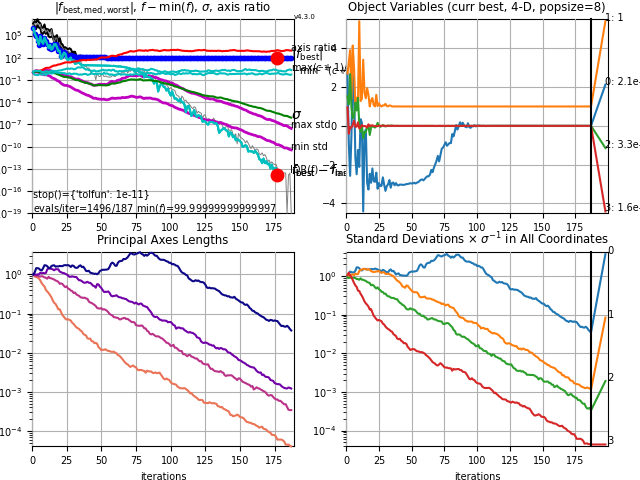

In [11]:
es.plot(xtransform=bfun.transform);  # show x-values (object variables) as evaluated on fun

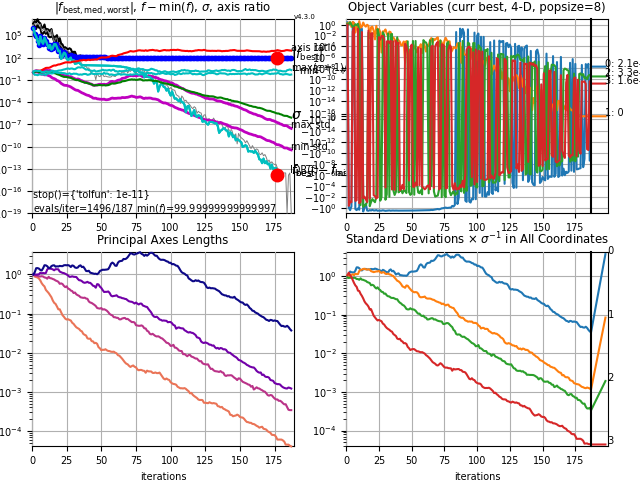

In [12]:
es.plot(xtransform=bfun.transform, xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]
       );  # show evaluated x-values minus x_opt in symlog display

All solutions in `es.result` need to be transformed with `ufun.transform` to represent solutions of `fun`.

In [13]:
bfun.transform(es.result.xbest)

array([-7.94700258e-08,  1.00000000e+00, -4.24189848e-10,  8.29683241e-11])

We can do the same with a flexible choice of boundary handlers using the `'bounds'` and `'BoundaryHander'` options. We can find out about these option by calling `CMAOptions`, as mentioned above, like

In [14]:
cma.CMAOptions('bound')  # returns options that contain "bound"

{'BoundaryHandler': 'BoundTransform  # or BoundPenalty, unused when ``bounds in (None, [None, None])``',
 'bounds': '[None, None]  # lower (=bounds[0]) and upper domain boundaries, each a scalar or a list/vector',
 'maxstd_boundrange': '1/3  # maximal std relative to bound_range per coordinate, overruled by maxstd'}

The default handler `BoundTransform` is based on the same code as `BoundDomainTransform`. In this case, the initial solution must be within the given bounds (it is, in our case). As above, `'bounds'` is a list of two values, `[lower_bounds, upper_bounds]`, where `lower_bounds` and `upper_bounds` can be a scalar that applies to all variables or a list. If the list is shorter than the initial solution, the last value is applied to the remaining dimensions.

Running the same example as above with the bounds option:

In [15]:
xopt_b, es_b = cma.fmin2(fun, x0, sigma0, {'bounds': [[None, 1, None], None]})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=470714, Wed Jul 23 21:37:36 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.073327765715868e+06 1.0e+00 8.42e-01  8e-01  8e-01 0:00.0
    2     16 1.806077862756479e+05 1.2e+00 1.03e+00  9e-01  1e+00 0:00.0
    3     24 1.030777687291727e+05 1.8e+00 1.08e+00  1e+00  1e+00 0:00.0
  100    800 1.000000269443858e+02 1.1e+03 3.04e-03  4e-06  4e-03 0:00.1
  175   1400 9.999999999999997e+01 1.1e+03 6.06e-07  4e-11  4e-08 0:00.1
termination on tolfun=1e-11 (Wed Jul 23 21:37:36 2025)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1401/1331 evaluations
incumbent solution: [-1.43859205e-08, 1.00000000e+00, -2.64774801e-10, -5.64406237e-11]
std deviation: [3.70043474e-08, 1.26134646e-09, 3.06692106e-10, 3.86477651e-11]


In [16]:
# now solutions _are_ transformed, the mean is not (hence ``plot_mean=True`` should use ``.boundary_handler.transform``)
es_b.result.xbest, es_b.mean, es_b.boundary_handler.transform(es_b.mean)

(array([ 1.79476226e-08,  1.00000000e+00, -2.31741475e-10, -6.98173515e-11]),
 array([-1.43859205e-08,  9.49999997e-01, -2.64774801e-10, -5.64406237e-11]),
 array([-1.43859205e-08,  1.00000000e+00, -2.64774801e-10, -5.64406237e-11]))

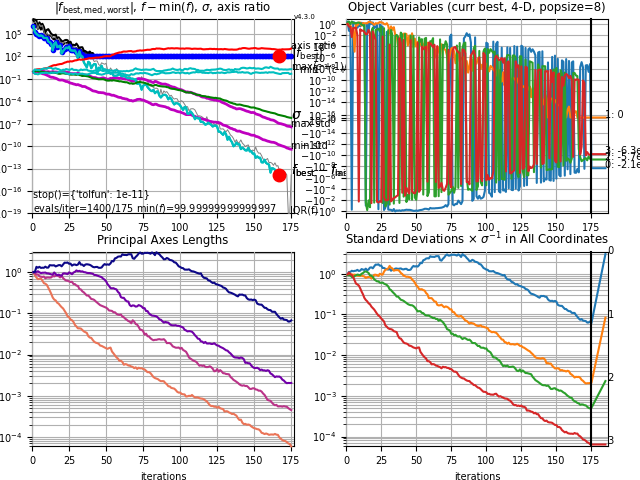

In [17]:
es_b.plot(xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]);

# Rescaling of the Objective
In a practical application, the encoding of variables is often essential to turn a _very_ difficult problem into less difficult one, see also [here](https://cma-es.github.io/cmaes_sourcecode_page.html#practical). The simplest encoding is a rescaling.
This can be done with the wrapper [`cma.ScaleCoordinates`](https://cma-es.github.io/apidocs-pycma/cma.fitness_transformations.ScaleCoordinates.html) class.
However, an alternative, simpler and more transparent solution is a coordinate-wise scaling of the initial `sigma` with the option `'CMA_stds'`.
In contrast to [`cma.ScaleCoordinates`](https://cma-es.github.io/apidocs-pycma/cma.fitness_transformations.ScaleCoordinates.html), this is also compatible with integer variables.
Again, the [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) give the hint where to look.

In [18]:
cma.CMAOptions('scale')

{'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). WAS: Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`'}

We rescale the ellipsoid function to its most benign form. In dimension 4, this saves (only) about 25% of the necessary evaluations.

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=401568, Wed Jul 23 21:37:41 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 3.213474148562035e+06 1.0e+00 9.68e-01  9e-01  9e+02 0:00.0
    2     16 1.791577312856773e+06 1.4e+00 1.18e+00  1e+00  1e+03 0:00.0
    3     24 2.829723545824677e+06 1.5e+00 1.14e+00  1e+00  9e+02 0:00.0
   94    752 5.823778233022445e-07 1.7e+00 7.26e-05  1e-06  1e-03 0:00.0
termination on ftarget=1e-06 (Wed Jul 23 21:37:41 2025)
final/bestever f-value = 6.099682e-07 5.823778e-07 after 753/749 evaluations
incumbent solution: [-2.29446941e-04, 2.81807512e-05, 5.31364051e-06, -4.42220602e-07]
std deviation: [1.44982217e-03, 1.87737363e-04, 1.19117662e-05, 1.46939147e-06]


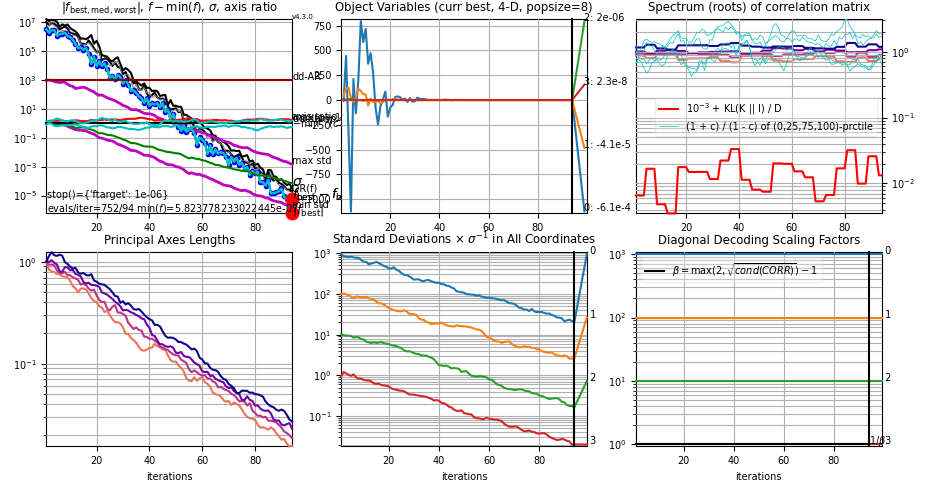

In [19]:
vec_sigma0 = [1e3 / 1e3**(i / 3) for i in range(4)]
xopt2, es2 = cma.fmin2(fun, x0, sigma0, {'CMA_stds': vec_sigma0, 'ftarget':1e-6})
cma.plot();

On the 40-dimension ellipsoid function, the saving is a factor of close to seven:

In [20]:
xopt40, es40 = cma.fmin2(fun, 40 * [2], sigma0, {'ftarget': 1e-6, 'verbose':-9})
vec_sigma0 = [1e3 / 1e3**(i / 39) for i in range(40)]
xopt0, es0 = cma.fmin2(fun, 40 * [2], sigma0, {'CMA_stds': vec_sigma0, 'ftarget': 1e-6, 'verbose':-9})

In [21]:
es40.result.fbest, es0.result.fbest, es40.result.evals_best / es0.result.evals_best

(7.822901904696347e-07, 5.45750561440811e-07, 6.866979885479371)

Without covariance matrix adaptation, the saving from rescaling is _much_ more substantial, namely a factor of about $10\,000$, which can be inferred from Figure 10 in [Hansen and Ostermeier (2001)](http://www.cmap.polytechnique.fr/~nikolaus.hansen/publications.html#hansenaost2001).

# Advanced Options Settings
## Setting the step-size adaptation
Apart from the default cumulative step-size adaptation, another competitive way to adapt the step-size is the two-point step-size adaptation, TPA, see Equations (6)-(8) in [Akimoto and Hansen (2016)](https://hal.inria.fr/hal-01306551).

In [22]:
cma.CMAOptions('sigma')

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_dampsvec_fac': 'np.inf  # tentative and subject to changes, 0.5 would be a "default" damping for sigma vector update',
 'CMA_dampsvec_fade': '0.1  # tentative fading out parameter for sigma vector update',
 'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'CSA_squared': 'False  #v use squared length for sigma-adaptation ',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). WAS: Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`',
 'stall_sigma_change_on_divergence_iterations': 'False  #v number of iterations of median worsenings threshold at which the sigma change is stalled; the default may become 2',
 'to

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=409629, Wed Jul 23 21:37:49 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 7.511101245043034e+05 1.0e+00 1.06e+00  1e+00  1e+00 0:00.0
    2     16 8.070981350048346e+04 1.1e+00 1.16e+00  1e+00  1e+00 0:00.0
    3     24 1.805133447556368e+05 1.3e+00 1.19e+00  1e+00  1e+00 0:00.0
  100    800 4.888611215951676e-02 7.6e+02 1.17e-01  1e-04  1e-01 0:00.0
  197   1576 9.309001750963769e-15 1.2e+03 3.56e-06  7e-11  7e-08 0:00.1
termination on tolfun=1e-11 (Wed Jul 23 21:37:49 2025)
final/bestever f-value = 5.008595e-15 1.673387e-15 after 1577/1543 evaluations
incumbent solution: [-4.49863450e-10, 2.61419122e-09, 5.47589902e-10, 3.64204053e-11]
std deviation: [6.57917523e-08, 7.35450966e-09, 5.53268020e-10, 6.51499849e-11]


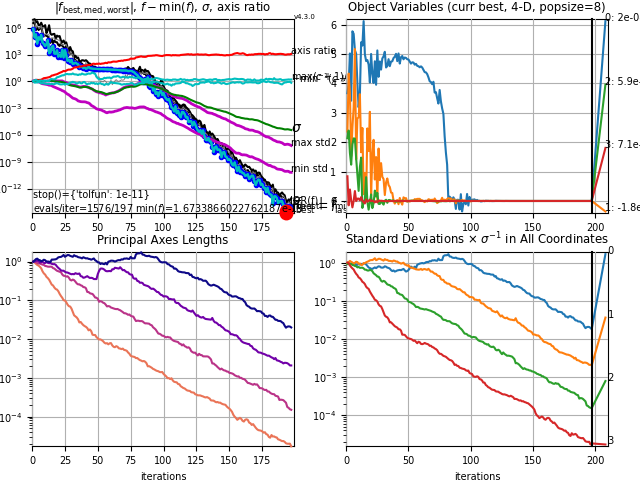

In [23]:
xopt, es = cma.fmin2(fun, x0, sigma0,
                     {'AdaptSigma': cma.sigma_adaptation.CMAAdaptSigmaTPA})
es.plot();

Without step-size adaptation, the "final" convergence stage of the optimization takes about 3 to 4 times longer (this effect becomes more pronounced in higher dimension):

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=355864, Wed Jul 23 21:37:53 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.739155844522358e+05 1.0e+00 1.00e+00  1e+00  1e+00 0:00.0
    2     16 2.725388587771453e+03 1.4e+00 1.00e+00  1e+00  1e+00 0:00.0
    3     24 2.827321487721590e+03 1.7e+00 1.00e+00  9e-01  1e+00 0:00.0
  100    800 7.655673365002230e-01 8.7e+02 1.00e+00  7e-04  7e-01 0:00.1
  200   1600 1.287164839393154e-04 9.8e+02 1.00e+00  9e-06  8e-03 0:00.1
  300   2400 7.252750403073324e-09 1.2e+03 1.00e+00  9e-08  1e-04 0:00.1
  396   3168 4.371478487856898e-13 1.6e+03 1.00e+00  8e-10  1e-06 0:00.2
termination on tolfun=1e-11 (Wed Jul 23 21:37:53 2025)
final/bestever f-value = 2.822897e-13 2.822897e-13 after 3169/3169 evaluations
incumbent solution: [-9.34434785e-08, 4.23010809e-08, -3.00522862e-09, -6.56189709e-11]
std deviation: [1.32774113e-06, 8.03195809e-08, 8.33629913e-09, 8.26455473e-10]


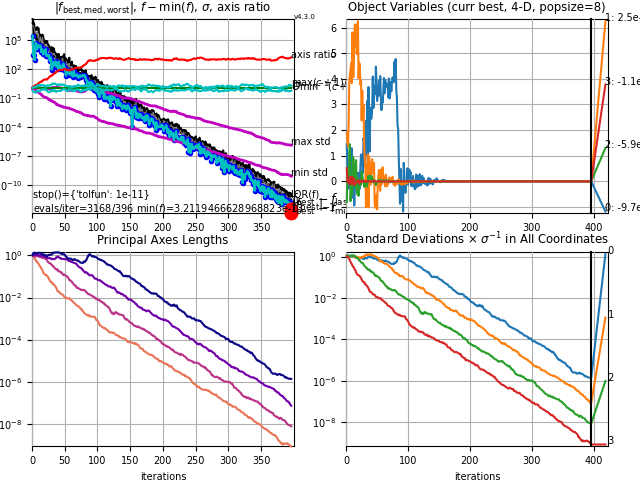

In [24]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'AdaptSigma': False})
es.plot();

## Setting different learning rates (not basics)
A more research related option is the manual setting of learning rates. We can find the relevant options for the covariance matrix update like

In [25]:
cma.CMAOptions('covar')

{'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_on': '1  # multiplier for all covariance matrix updates',
 'CMA_rankmu': '1.0  # multiplier for rank-mu update learning rate of covariance matrix',
 'CMA_rankone': '1.0  # multiplier for rank-one update learning rate of covariance matrix',
 'tolconditioncov': '1e14  #v stop if the condition of the covariance matrix is above `tolconditioncov`'}

If we want to run CMA-ES only with rank-$\mu$ update, we set the learning rate for the rank-one update to zero. Then, to get a solution of the same quality on the 4-dimensional ellipsoid function, it takes on average about 15% more iterations.

In [26]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'CMA_rankone': 0})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=402724, Wed Jul 23 21:37:57 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 3.059456723390169e+05 1.0e+00 1.03e+00  1e+00  1e+00 0:00.0
    2     16 2.372125348642639e+05 1.3e+00 1.17e+00  1e+00  1e+00 0:00.0
    3     24 1.166016032869528e+05 1.3e+00 9.81e-01  8e-01  1e+00 0:00.0
  100    800 4.766612237567803e-01 4.2e+02 5.42e-02  4e-04  2e-01 0:00.0
  200   1600 9.431816334824605e-11 1.0e+03 1.58e-05  2e-08  1e-05 0:00.1
  239   1912 2.511418182413811e-14 8.3e+02 2.73e-07  1e-10  1e-07 0:00.1
termination on tolfun=1e-11 (Wed Jul 23 21:37:57 2025)
final/bestever f-value = 2.388981e-14 2.388981e-14 after 1913/1913 evaluations
incumbent solution: [-9.97758857e-08, -7.11110269e-09, 3.60683545e-10, -8.70452479e-11]
std deviation: [9.75378836e-08, 1.03763039e-08, 1.02511666e-09, 1.17094840e-10]


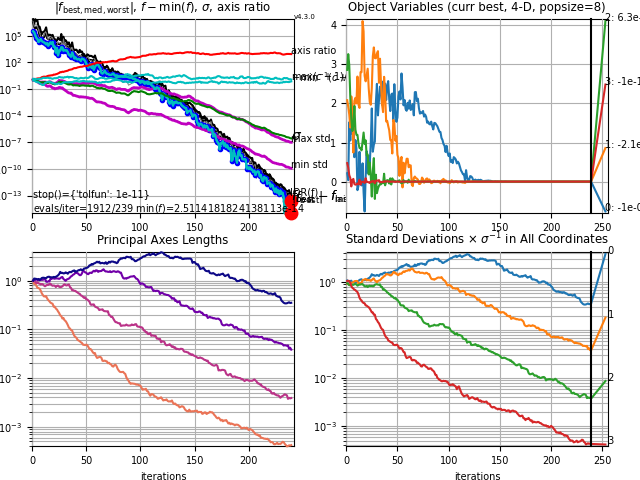

In [27]:
es.plot();

# See Also

Other [`notebooks and recipes`](https://github.com/CMA-ES/pycma/tree/master/notebooks), as this one, can be found at [https://github.com/CMA-ES/pycma/tree/master/notebooks](https://github.com/CMA-ES/pycma/tree/master/notebooks)

More `notebook-recipes` to come...